In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dataset1_clean.csv")
df.head()

,Unnamed: 0,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,habit_clean,date,minutes_after_sunset,minutes_after_rat_arrival
0,0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.870833,0,rat,2017-12-30,112.0,1.800000
1,1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.100833,0,fast,2017-12-30,186.0,0.283333
2,2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.107500,0,fast,2017-12-30,186.0,0.683333
3,3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.126944,0,rat,2017-12-30,187.0,1.850000
4,4,2017-12-30 19:54:00,15.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.150000,0,rat,2017-12-30,189.0,3.233333


rat_present
1    906
Name: count, dtype: int64


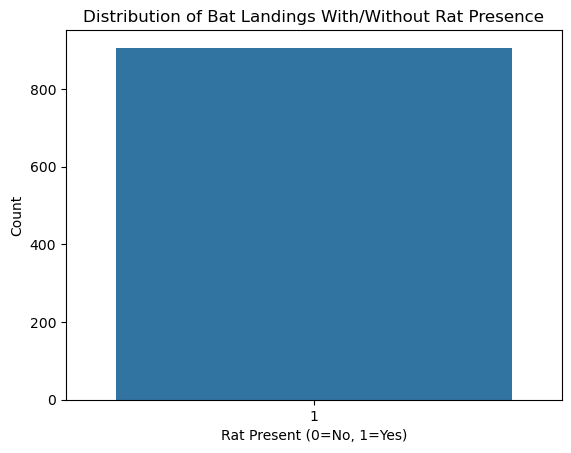

In [4]:
# -------------------------
# 1. Overview of rat presence vs. absence
# -------------------------
df["rat_present"] = df["seconds_after_rat_arrival"].apply(lambda x: 0 if pd.isna(x) else 1)

print(df["rat_present"].value_counts())

sns.countplot(x="rat_present", data=df)
plt.title("Distribution of Bat Landings With/Without Rat Presence")
plt.xlabel("Rat Present (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

rat_present         1
risk                 
0            0.505519
1            0.494481


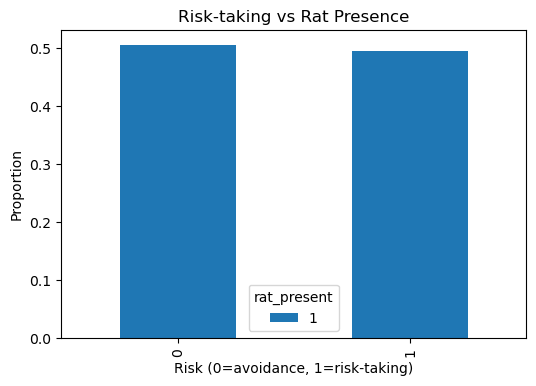

In [5]:
# -------------------------
# 2. Bat risk-taking behaviour vs. rat presence
# -------------------------
risk_rat = pd.crosstab(df["risk"], df["rat_present"], normalize="columns")
print(risk_rat)

risk_rat.plot(kind="bar", figsize=(6,4))
plt.title("Risk-taking vs Rat Presence")
plt.xlabel("Risk (0=avoidance, 1=risk-taking)")
plt.ylabel("Proportion")
plt.show()

rat_present         1
reward               
0            0.465784
1            0.534216


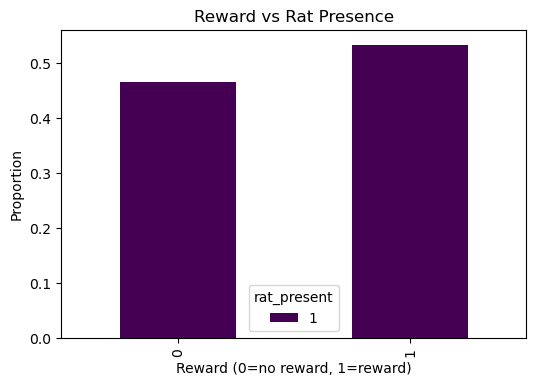

In [7]:
# -------------------------
# 3. Reward outcomes vs. rat presence
# -------------------------
reward_rat = pd.crosstab(df["reward"], df["rat_present"], normalize="columns")
print(reward_rat)

reward_rat.plot(kind="bar", figsize=(6,4), colormap="viridis")
plt.title("Reward vs Rat Presence")
plt.xlabel("Reward (0=no reward, 1=reward)")
plt.ylabel("Proportion")
plt.show()

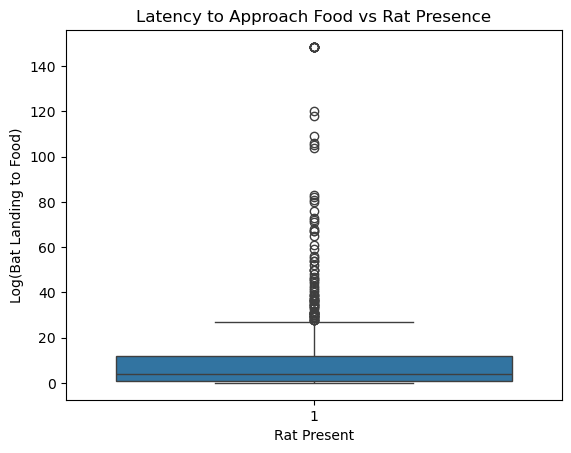

In [9]:
# -------------------------
# 4. Hesitation time before food (log scale) vs. rat presence
# -------------------------
sns.boxplot(x="rat_present", y="bat_landing_to_food", data=df)
plt.title("Latency to Approach Food vs Rat Presence")
plt.xlabel("Rat Present")
plt.ylabel("Log(Bat Landing to Food)")
plt.show()

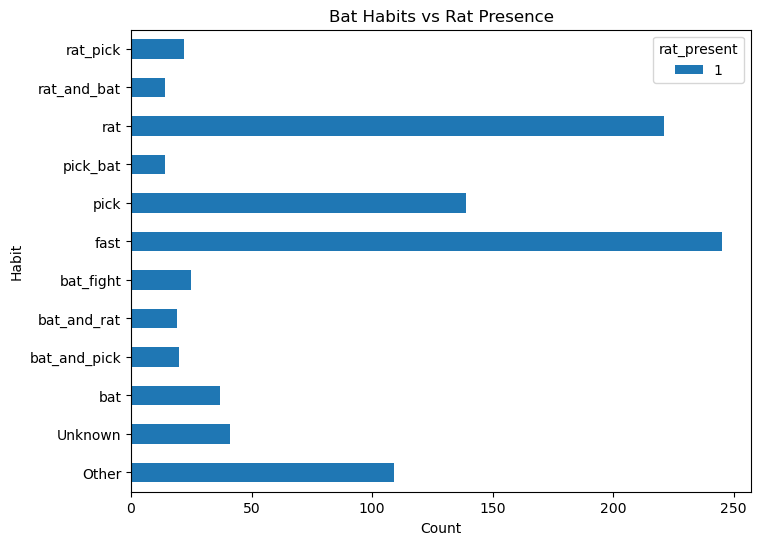

In [10]:
# -------------------------
# 5. Behavioural context (habit_clean) vs. rat presence
# -------------------------
habit_rat = pd.crosstab(df["habit_clean"], df["rat_present"])
habit_rat.plot(kind="barh", stacked=True, figsize=(8,6))
plt.title("Bat Habits vs Rat Presence")
plt.xlabel("Count")
plt.ylabel("Habit")
plt.show()

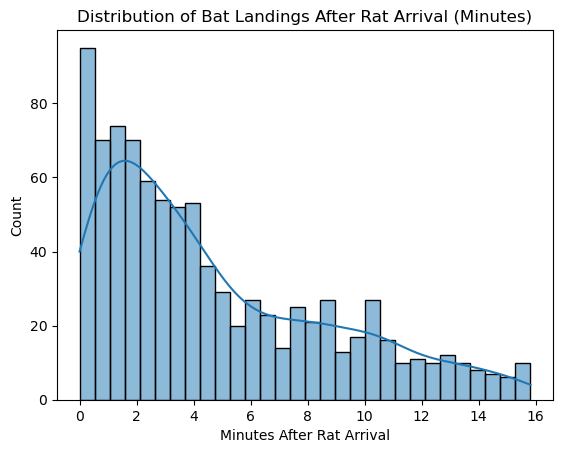

In [11]:
# -------------------------
# 6. Reaction timing after rat arrival
# -------------------------
sns.histplot(df["minutes_after_rat_arrival"].dropna(), bins=30, kde=True)
plt.title("Distribution of Bat Landings After Rat Arrival (Minutes)")
plt.xlabel("Minutes After Rat Arrival")
plt.ylabel("Count")
plt.show()